In [32]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy

In [33]:
!python --version

Python 3.9.16


In [34]:
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
#%ls drive/MyDrive/ColabNotebooks/pytorch
#%cd drive/MyDrive/ColabNotebooks/pytorch
#!ls

In [36]:
%pwd
#%cd CodeProj2/02_Learn/pytorch/
!ls chihuahua_muffin/


test  train


In [37]:
torch.tensor([1,3]) + torch.tensor([5,5])

tensor([6, 8])

# dataset and loader

In [38]:
# train_data = datasets.FashionMNIST(root='data', train=True,download=True,transform=ToTensor())
# test_data = datasets.FashionMNIST(root='data',train=False, download=True,transform=ToTensor())

# Define transformations for image preprocessing (optional)
transform = transforms.Compose([
    transforms.Resize(255),  # Adjust size as needed  255 
    transforms.CenterCrop(224),  # Adjust size as needed 224
    transforms.RandomHorizontalFlip(), # just try
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
TRAIN ='chihuahua_muffin_small/train'
VAL = 'chihuahua_muffin_small/test'
# Create dataset
#train_data = datasets.ImageFolder(root='chihuahua_muffin/train', transform=transform)
# trainset=   datasets.ImageFolder(root='chihuahua_muffin_small/train', transform=transform)
# test_data = datasets.ImageFolder(root='chihuahua_muffin_small/test',transform=transform)

# ## make validation set

# train_size = int(0.8 * len(trainset))
# val_size = len(trainset) - train_size

# train_indices, val_indices = torch.utils.data.random_split(range(len(trainset)), [train_size, val_size])
# #train_data, val_data = torch.utils.data.random_split(trainset.data, [train_size, val_size])
# train_data = Subset(trainset, train_indices)
# val_data = Subset(trainset, val_indices)


In [39]:
def train_val_dataset(dataset, val_split=0.2):
    #train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    train_size = int( (1-val_split) * len(dataset))
    val_size = len(dataset) - train_size

    train_idx, val_idx = torch.utils.data.random_split(range(len(dataset)), [train_size, val_size])
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

#trainset= datasets.ImageFolder(root='chihuahua_muffin/train', transform=transform)
dataset = datasets.ImageFolder(root='chihuahua_muffin_small/train', transform=transform)
print(len(dataset))
img_datasets = train_val_dataset(dataset)
print(f"train: len(img_datasets['train'])")
print(len(img_datasets['val']))
# The original dataset is available in the Subset class
print(img_datasets['train'].dataset)

train_data = img_datasets['train']
val_data = img_datasets['val']
test_data = datasets.ImageFolder(root='chihuahua_muffin_small/test',transform=transform)

1596
train: len(img_datasets['train'])
320
Dataset ImageFolder
    Number of datapoints: 1596
    Root location: chihuahua_muffin_small/train
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [40]:
#classes = train_data.classes
#classes
test_data.classes
test_data.class_to_idx

{'chihuahua': 0, 'muffin': 1}

In [41]:
test_data.samples[-10:]

[('chihuahua_muffin_small/test/muffin/img_4_956.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_960.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_971.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_972.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_978.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_979.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_989.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_991.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_996.jpg', 1),
 ('chihuahua_muffin_small/test/muffin/img_4_997.jpg', 1)]

In [42]:
batch_size = 128
train_dataloader = DataLoader(train_data, batch_size=batch_size,num_workers=4)
val_dataloader = DataLoader(val_data, batch_size=batch_size,num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=batch_size,num_workers=4)


In [43]:
len(train_dataloader)
test_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 981
    Root location: chihuahua_muffin_small/test
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [44]:
for X, y in test_dataloader:
    print(f' {X.shape}')
    print(f'shape of y {y.shape} {y.dtype} ')
    break

 torch.Size([128, 3, 224, 224])
shape of y torch.Size([128]) torch.int64 


torch.Size([3, 224, 224])


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_81162/1187792183.py:5: RuntimeWarning: invalid value encountered in cast
  plt.imshow((img.permute(1,2,0) * 255).numpy().astype('uint16'))


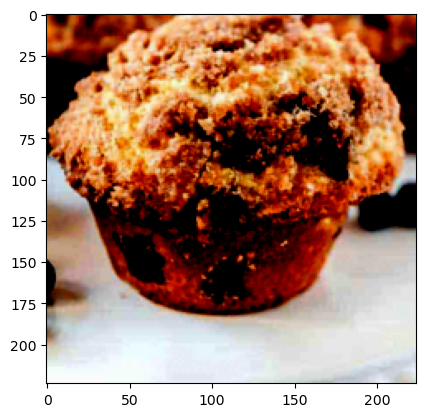

In [45]:
img, lab = train_data[1]
print(img.shape)
lab
## plot 3 channels image- need to permute channel to the last dimension
plt.imshow((img.permute(1,2,0) * 255).numpy().astype('uint16'))

torch.Size([3, 224, 224]) 0


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_81162/1324417834.py:20: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')


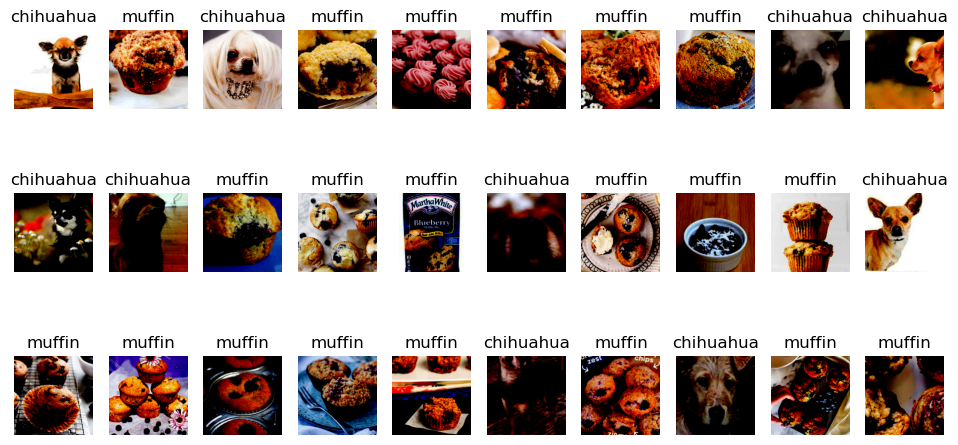

In [46]:
# print sample of data
import warnings
#warnings.filterwarnings('ignore', message='not allowed')

img , label = train_data[0]
print(img.shape, label)


labels = [
   "chihuahua","muffin"
]

row,col=3,10
fig, ax = plt.subplots(row,col,figsize=(12,6))
counter=0
for r in range(row):
    for c in range(col):
        img , lab = train_data[counter]
        img_permute = img.permute(1,2,0)
        img_permute = (img_permute*255).numpy().astype('uint16')
        ax[r,c].imshow(img_permute)
        ax[r,c].set_axis_off()

        #title = "("+str(lab)+")"
        ax[r,c].set_title(labels[lab])
        counter+=1


# Model Architecture

In [47]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    #else "mps"
    #if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             #nn.Linear(28*28, 512),
#             nn.Linear(3*224*224, 512),
#             nn.ReLU(),
#             #nn.Linear(512, 512),
#             nn.Linear(512, 1024),
#             nn.Linear(1024, 512),
#             nn.Linear(512, 256),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             #nn.Linear(512, 10)
#             nn.Linear(128, 2)
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits
# class Convo(nn.Module):
#     def __init__(self):
#         super().__init__()
#         #self.flatten = nn.Flatten()
#         self.image_stack = nn.Sequential(
#             ## n+2p-f/s  +1 =(224+2(1) -3)/1 +1 =224
#             # nn.Conv2d(3,128,kernel_size=3,padding=1),
#             # nn.BatchNorm2d(128),
#             # nn.MaxPool2d(2), ##  112 , 92
#             # nn.ReLU(),
#             # nn.Conv2d(128,512,kernel_size=3,padding=1),
#             # nn.BatchNorm2d(512),
#             # nn.MaxPool2d(2), ##  56 , 46
#             # nn.ReLU(),
#             # #nn.Conv2d(512,32,kernel_size=3,padding=1),
#             # #nn.MaxPool2d(2), ##  28 , 23
#             # #nn.ReLU(),
#             # nn.Flatten(),
#             # #nn.Linear(16*4*4, 120) ## 120 is whatever
#             # nn.Linear(512 *56*56   ,300),
#             # nn.ReLU(),
#             # nn.Linear(300  ,120),
#             # nn.Linear(120, 1),
#             #nn.Sigmoid()
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

#             nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

#             nn.Flatten(), 
#             nn.Dropout(0.2),
#             nn.Linear(256*28*28, 1024),
#             nn.BatchNorm1d(1024),
#             nn.ReLU(),
#             nn.Linear(1024, 512),
#             nn.BatchNorm1d(512),
#             nn.ReLU(),
#             nn.Linear(512, 1)
            
#         )

#     def forward(self, x):
#         #x = self.flatten(x)
#         logits = self.image_stack(x)
#         return logits

#model = NeuralNetwork().to(device)
#model = Convo().to(device)

#Pre-trained ResNet Model
model = models.resnet50(pretrained=True)

# Freeze Base Model Parameters
for param in model.parameters():
    param.requires_grad = False

# Replace Final Classifier Layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification

# Loss Function and Optimizer
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)


print(model)

Using cpu device
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [48]:
i = 0
for batch, (xx,yy) in enumerate(test_dataloader):
    print(batch, xx.shape,yy.shape)
    i+=1
    if i == 3:
        break

0 torch.Size([128, 3, 224, 224]) torch.Size([128])
1 torch.Size([128, 3, 224, 224]) torch.Size([128])
2 torch.Size([128, 3, 224, 224]) torch.Size([128])


In [49]:
# Example Conv2d layer
conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)

# Sample input tensor with shape (batch_size, channels, height, width)
x = torch.randn(128, 3, 224, 224)

# Apply the convolution layer
output = conv1(x)
output.shape

torch.Size([128, 64, 224, 224])

In [50]:
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.BCEWithLogitsLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=.9)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# def train(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     model.train()
#     for batch, (X, y) in enumerate(dataloader):
#         X, y = X.to(device), y.to(device)
#         y = y.unsqueeze(1).float()
#         # Compute prediction error
#         pred = model(X)
#         loss = loss_fn(pred, y)

#         # Backpropagation
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         if batch % 20 == 0:
#             print(f'batch = {batch}',end=" ")
#             loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            #y= y.unsqueeze(1).float() # For BCELoss
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [51]:
# epochs = 10
# for t in range(epochs):
#     print(f"Epoch {t+1} \n ------------------")
#     train(train_dataloader,model,loss_fn, optimizer)
#     print(f'finish train epoch {t+1}')
#     test(test_dataloader,model, loss_fn)
# print('Done!')

In [52]:
## Method 2
#loss_fn = nn.BCEWithLogitsLoss()

learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
def train_one_epoch(epoch_index, tb_writer,training_loader):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        #labels= labels.unsqueeze(1).float() ## FOR BCELoss
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 5 == 0:
            last_loss = running_loss / 5 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss



In [53]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 1

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer,train_dataloader)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    correct=0
    with torch.no_grad():
        for i, vdata in enumerate(val_dataloader):
            
            vinputs, vlabels = vdata
            # X, y = X.to(device), y.to(device)
            #vlabels = vlabels.unsqueeze(1).float() ## For BCELoss
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct += (voutputs.argmax(1) == vlabels).type(torch.float).sum().item()
            print(f'--correct before division now = {correct}')

    avg_vloss = running_vloss / (i + 1)
    correct /= len(val_dataloader.dataset)
    print(f'LOSS train {avg_loss} valid {avg_vloss:>8f}  Val Accuracy {(100*correct):>0.4f}% (Val size = {len(val_dataloader.dataset)})')
    #print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {avg_vloss:>8f} \n")


    #test(test_dataloader,model, loss_fn)
    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1 loss: 0.17841004133224486
  batch 6 loss: 0.5827939331531524
--correct before division now = 120.0
--correct before division now = 237.0
--correct before division now = 297.0
LOSS train 0.5827939331531524 valid 0.203954  Val Accuracy 92.8125% (Val size = 320)


In [54]:
torch.save(model.state_dict(), "model_muffin_weights-resnet-medium.pth")
#torch.save(model.state_dict(), "model_muffin-s.pth")
print("Saved PyTorch Model State to model_muffin_weights-resnet.pth")

Saved PyTorch Model State to model_muffin_weights-resnet.pth


In [55]:
!ls

basic_mnist.ipynb                      model_20240813_225810_9
basic_mnist2.ipynb                     model_20240814_114637_0
chihuahua_muffin                       model_20240814_114637_1
chihuahua_muffin-0.2.ipynb             model_20240814_114637_2
chihuahua_muffin-resnet01.ipynb        model_20240814_134232_0
chihuahua_muffin.ipynb                 model_20240814_134232_1
chihuahua_muffin_small                 model_20240814_134232_2
chihuahua_muffin_small2                model_20240814_141217_0
data                                   model_20240814_215403_0
model1.pth                             model_muffin-resnet.pth
model_20240813_225810_3                model_muffin.pth
model_20240813_225810_5                model_muffin_weights-resnet-medium.pth
model_20240813_225810_6                model_muffin_weights-resnet.pth
model_20240813_225810_7                runs


In [56]:
#model = Convo().to(device)
model1 = models.resnet50(pretrained=False)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, 2)
model1.load_state_dict(torch.load("model_muffin_weights-resnet.pth"))
model1.eval()

/Users/porrameth/miniconda3/envs/py39_conda-pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:
def display_incorrect_images(dataset):
    row,col=2,5
    fig, ax = plt.subplots(row,col,figsize=(12,6))
    counter=0
    for r in range(row):
        for c in range(col):
            img , lab, pred = dataset[counter]
            img_permute = img.permute(1,2,0)
            img_permute = (img_permute*255).numpy().astype('uint16')
            ax[r,c].imshow(img_permute)
            ax[r,c].set_axis_off()

            #title = "("+str(lab)+")"
            ax[r,c].set_title(f'Pred:{labels[pred]}\nActual:{labels[lab]}')
            counter+=1
        

def test_testset(model=model1):
    model.eval()
    test_loss = 0
    correct = 0
    incorrect_preds = []
    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            #target = target.unsqueeze(1).float() ## for BCELoss
            output = model(data)
            #output = output.unsqueeze(1).float()
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True) 
            # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            for idx in range(len(data)):
                if pred[idx] != target[idx]:
                    incorrect_preds.append((data[idx], target[idx], pred[idx]))
    #for img, lab, pred in incorrect_preds:
    #    plt.imshow(img.cpu().permute(1,2,0))
    #    plt.title(f'True:{lab}, Predicted:{pred}')
    #    plt.show
    display_incorrect_images(incorrect_preds)
    
    test_loss /= len(test_dataloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_dataloader.dataset),
        100. * correct / len(test_dataloader.dataset)))


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_81162/680849459.py:9: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')



Test set: Average loss: 0.0017, Accuracy: 927/981 (94%)



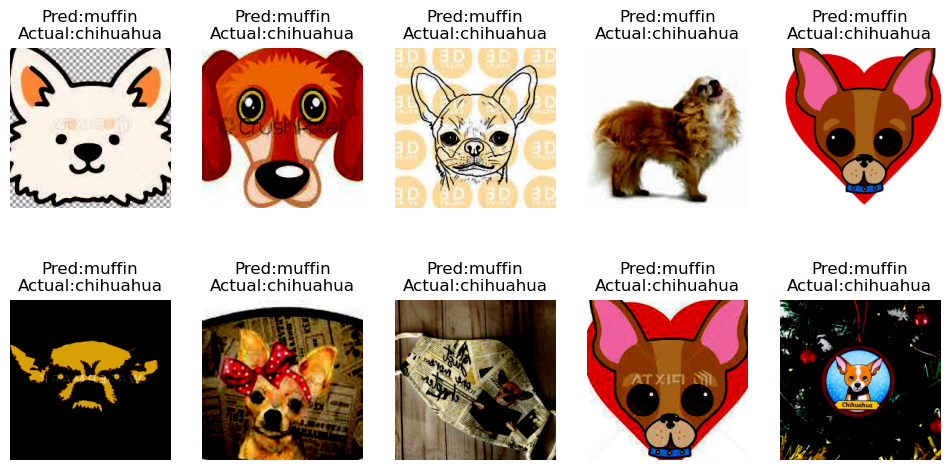

In [58]:
test_testset(model=model)

/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_81162/680849459.py:9: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')



Test set: Average loss: 0.0016, Accuracy: 965/981 (98%)



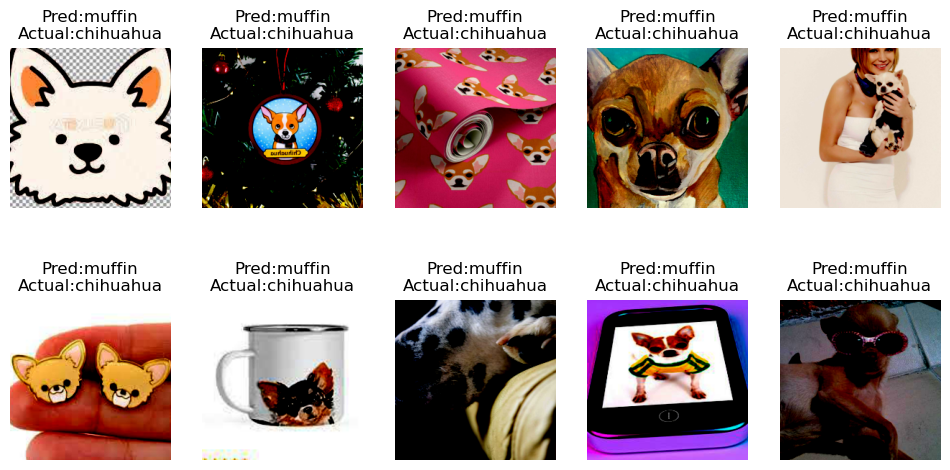

In [62]:
test_testset()

In [60]:
test_data[0][0].shape

torch.Size([3, 224, 224])

In [61]:
test_data[0][1]

0